# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [4]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [5]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

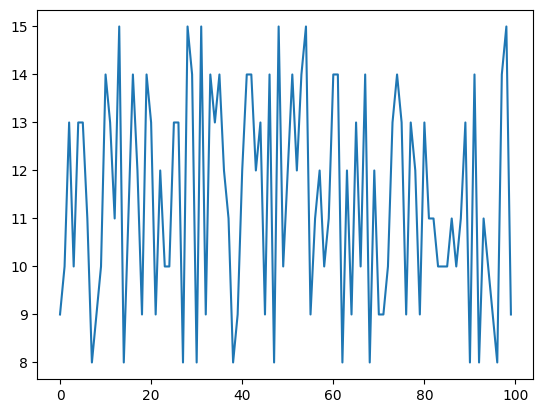

In [6]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

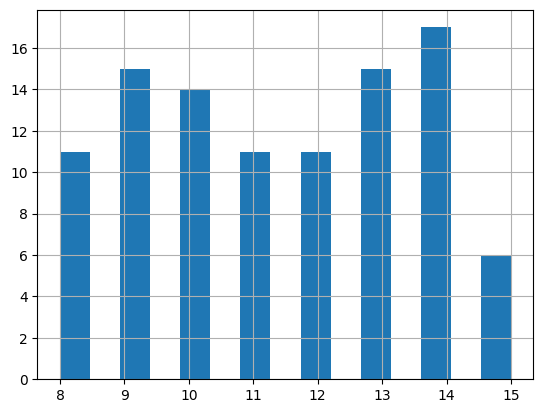

In [7]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [10]:
df.國文.mean()

11.39

算標準差。

In [11]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [18]:
df = df.describe()
df

,國文,英文,數學,自然,社會
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,21.198357,21.206645,21.485065,21.155965,21.539569
std,32.070449,32.064438,31.965024,32.084666,31.947519
min,2.196853,2.273164,2.310516,2.217720,2.486550
25%,8.750000,8.750000,9.500000,8.750000,8.750000
50%,11.195000,11.190000,11.285000,11.015000,11.915000
75%,13.500000,13.500000,14.250000,13.500000,14.250000
max,100.000000,100.000000,100.000000,100.000000,100.000000


有時我們很愛看的相關係數矩陣。

In [19]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,1.000000,0.999950,0.999998,0.999950
英文,1.000000,1.000000,0.999948,0.999998,0.999949
數學,0.999950,0.999948,1.000000,0.999952,0.999929
自然,0.999998,0.999998,0.999952,1.000000,0.999936
社會,0.999950,0.999949,0.999929,0.999936,1.000000


只算兩科間的相關係數當然也可以。

In [20]:
df.國文.corr(df.數學)

np.float64(0.9999501241399262)

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [33]:
df = pd.read_csv("data/grades.csv")
df["總級分"] = df.sum(axis = 1, numeric_only=True)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [35]:
df['加權'] = df.國文 + df.英文 + df.數學*2

In [36]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [37]:
df.sort_values(by='總級分')

,姓名,國文,英文,數學,自然,社會,總級分,加權
18,梁慧君,9,8,8,8,12,45,33
7,林金鳳,8,9,10,10,8,45,37
1,胡玉華,10,10,10,8,9,47,40
32,林建亨,9,11,8,8,11,47,36
93,李曼夢,11,9,11,8,8,47,42
...,...,...,...,...,...,...,...,...
64,俞志峰,9,14,13,14,15,65,49
54,陳怡潔,15,15,9,15,11,65,48
57,胡淳茜,12,15,14,13,11,65,55
12,李正偉,11,15,11,14,15,66,48


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [38]:
df2 = df.sort_values(by = ["加權", "總級分"], ascending=False)

### 【重點】重設 index

In [39]:
df2.index = range(1, 101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [40]:
df2[df2.數學 == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [41]:
df2[(df2.數學 == 15) & (df2.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [42]:
df2.drop("總級分", axis=1)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 但是．．．

In [43]:
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,51,36
97,胡凱琳,10,8,9,9,15,51,36
98,林建亨,9,11,8,8,11,47,36
99,梁慧君,9,8,8,8,12,45,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [44]:
df3 = df2
df2.drop("總級分" , axis=1, inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [46]:
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [47]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [50]:
df2[df2.姓名 == "李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
5,李士賢,10,14,15,13,13,54


In [53]:
df2.drop(df2[df2.姓名 == "李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [56]:
import pandas_datareader as pdr
# df = pdr.get_data_yahoo('AAPL')

In [55]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [57]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [59]:
df = df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 20 日的移動平均

<Axes: xlabel='Date'>

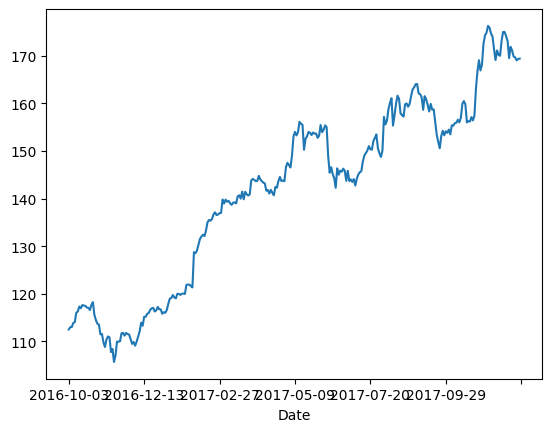

In [63]:
df.Close.plot()

<Axes: xlabel='Date'>

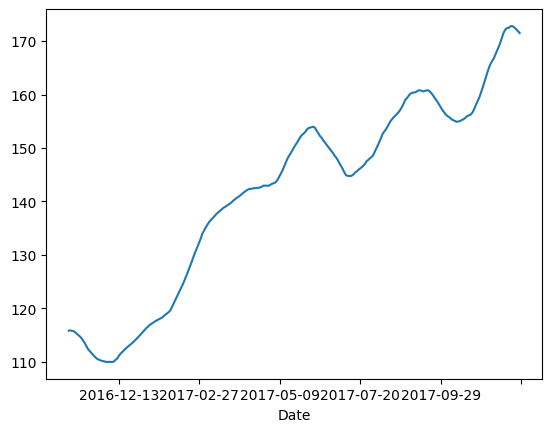

In [65]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

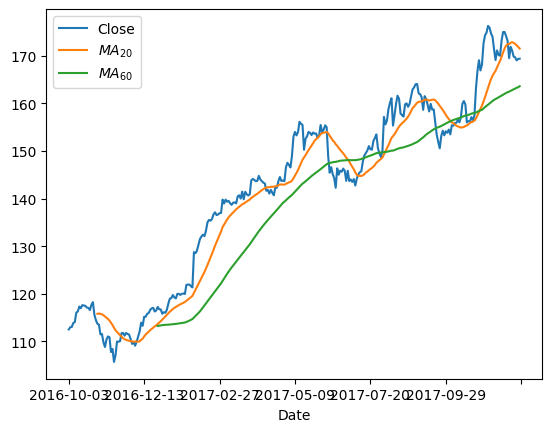

In [66]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [68]:
close = df.Close.values
len(close)

300

In [69]:
x = close[:-1]
len(x)

299

In [70]:
y = close[1:]
len(y)

299

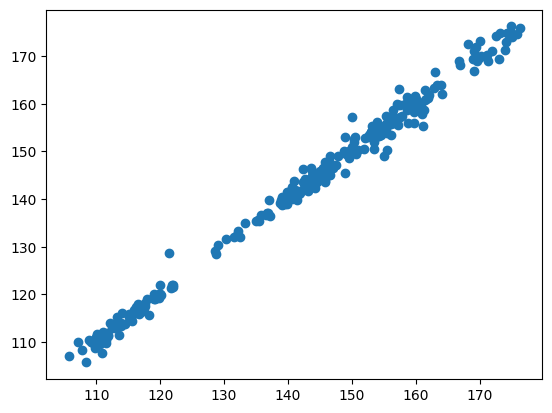

In [71]:
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [72]:
mydata = np.random.randn(4,3)

In [73]:
mydata

array([[ 0.37438578, -0.21231608, -0.47738811],
       [-0.35766953, -1.11766483, -0.41635068],
       [ 0.68229041,  0.32703417,  0.52779705],
       [-1.84740897, -1.05972153, -0.15889103]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [74]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [75]:
df2

,A,B,C
0,0.374386,-0.212316,-0.477388
1,-0.357670,-1.117665,-0.416351
2,0.682290,0.327034,0.527797
3,-1.847409,-1.059722,-0.158891


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [76]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [77]:
df3

,A,B,C
0,0.309557,-0.411658,0.413369
1,0.552712,-0.094174,-0.086511
2,1.485549,-1.973881,-0.323272


In [79]:
df4 = pd.concat([df2, df3], axis=0)

In [80]:
df4

,A,B,C
0,0.374386,-0.212316,-0.477388
1,-0.357670,-1.117665,-0.416351
2,0.682290,0.327034,0.527797
3,-1.847409,-1.059722,-0.158891
0,0.309557,-0.411658,0.413369
1,0.552712,-0.094174,-0.086511
2,1.485549,-1.973881,-0.323272


前面我們弄得亂七八糟的 index 重設一下。

In [81]:
df4.index = range(7)

In [82]:
df4

,A,B,C
0,0.374386,-0.212316,-0.477388
1,-0.357670,-1.117665,-0.416351
2,0.682290,0.327034,0.527797
3,-1.847409,-1.059722,-0.158891
4,0.309557,-0.411658,0.413369
5,0.552712,-0.094174,-0.086511
6,1.485549,-1.973881,-0.323272


#### 横向的貼

In [83]:
df5 = pd.concat([df2, df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [84]:
df5

,A,B,C,A,B,C
0,0.374386,-0.212316,-0.477388,0.309557,-0.411658,0.413369
1,-0.357670,-1.117665,-0.416351,0.552712,-0.094174,-0.086511
2,0.682290,0.327034,0.527797,1.485549,-1.973881,-0.323272
3,-1.847409,-1.059722,-0.158891,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [ ]:
df_names = pd.read_csv("data/names.csv", names=["姓名"])
df_names = pd.read_csv("data/grade2.csv")

In [3]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [4]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [ ]:
# df_grades.to_csv("data/grade2.csv")

In [8]:
df_grades

,國文,英文,數學,社會,自然
0,13,11,10,8,15
1,12,9,12,14,7
2,11,7,12,6,7
3,15,10,13,6,6
4,11,15,15,10,10
...,...,...,...,...,...
95,11,13,9,10,10
96,13,13,15,15,14
97,6,12,8,10,9
98,6,15,15,14,7


In [9]:
df_x = pd.concat([df_names, df_grades], axis=1)

In [10]:
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,13,11,10,8,15
1,王紹尹,12,9,12,14,7
2,黃季坤,11,7,12,6,7
3,許正書,15,10,13,6,6
4,張鈞蓮,11,15,15,10,10
...,...,...,...,...,...,...
95,陳君生,11,13,9,10,10
96,曾桂甫,13,13,15,15,14
97,林欣怡,6,12,8,10,9
98,林佳霖,6,15,15,14,7
